In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import os

In [3]:
#Load gene expression data object
#lihc = gdc_data('LIHC')
#lihc.read_csv()

#Load methylation data
#can = "jhu-usc.edu_LIHC.HumanMethylation450.1.lvl-3.TCGA-BC-A10Q-01A-11D-A132-05.gdc_hg38.txt"
#hea = "jhu-usc.edu_LIHC.HumanMethylation450.1.lvl-3.TCGA-BC-A10Q-11A-11D-A132-05.gdc_hg38.txt"
#meth_can = pd.read_table(can,sep="\t")
#meth_can = pd.read_table(hea,sep="\t")

data = pd.read_csv("../data/gene_expression_clinical.csv",index_col=0)

In [ ]:
data.drop(data.columns[[60483,60484,60485,60486,60488,60489,60490,60491,60492,60493,60494,60495]],axis=1,inplace=True)
data.head()

,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,lymphocyte,sample_type,tumor_stage,yob,race,sex,cig_per_day,age,smoke,prognosis
X15a44c9d.7c84.4170.96a1.358dd796aa65.htseq.counts,4219,4,1070,565,133,1493,54514,2894,6042,867,...,53,0,0,1942,0,1,0.0,25489,0,0
X160aee04.df36.4e94.90c5.b01b2991ba48.htseq.counts,3428,5,821,502,537,278,103347,2307,4815,486,...,60,0,1,1984,0,0,0.0,7363,0,0
X1d86dc66.1a62.4cbc.9973.ae63ab754d6a.htseq.counts,5284,7,1403,704,119,629,98287,3840,7077,673,...,58,0,2,1963,2,1,0.0,15410,0,1149
X2b8bf629.3c22.4dcb.a9a5.ec01c5099167.htseq.counts,3236,0,697,643,56,200,39678,1685,5872,477,...,53,0,0,1924,0,1,0.0,27944,0,837
X2cc2e3ce.68cd.4690.9fff.5ecf86c2f57a.htseq.counts,3051,11,984,353,70,387,36361,2870,4070,586,...,80,0,1,1930,0,1,0.0,27530,0,194


In [13]:
#Principle component analysis
from sklearn.decomposition import PCA

In [98]:
y = np.zeros((data.shape[0],2))
y[:,0] = data['sample_type'].values
y[:,1] = [1 if x==0 else 0 for x in y[:,0]]
Y = y

In [27]:
pca = PCA(n_components=15) #Make a PCA object with n = 15 PCs
pca.fit(data.drop(['sample_type'],axis=1))

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [100]:
pc = pca.transform(data.drop(['sample_type'],axis=1))
pc.shape

(1114, 15)

In [101]:
#Shuffle the data set
X,Y = shuffle(pc,Y,random_state=1)

In [103]:
#Convert the dataset into train and test set
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.30, random_state=415)

In [104]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(779, 15)
(779, 2)
(335, 15)


In [6]:
#Variables and parameters to work with tensors
learning_rate = 0.3
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)
n_dim = X.shape[1]
n_class = 2
model_path = os.getcwd()

n_hidden_1 = 16
n_hidden_2 = 16
n_hidden_3 = 16
n_hidden_4 = 16

x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32,[None,n_class])


NameError: name 'np' is not defined

epoch :  0  -  cost:  2.25017  - MSE:  73.2307214577 - Train Accuracy:  0.81258
epoch :  1  -  cost:  1.20466  - MSE:  42.1305700764 - Train Accuracy:  0.810013
epoch :  2  -  cost:  0.62104  - MSE:  30.2350553006 - Train Accuracy:  0.810013
epoch :  3  -  cost:  0.564161  - MSE:  28.929346126 - Train Accuracy:  0.799743
epoch :  4  -  cost:  0.533475  - MSE:  29.375804217 - Train Accuracy:  0.810013
epoch :  5  -  cost:  0.51006  - MSE:  29.0664501145 - Train Accuracy:  0.808729
epoch :  6  -  cost:  0.492105  - MSE:  29.2216528287 - Train Accuracy:  0.815148
epoch :  7  -  cost:  0.477101  - MSE:  29.0679157203 - Train Accuracy:  0.810013
epoch :  8  -  cost:  0.464897  - MSE:  29.1558080313 - Train Accuracy:  0.815148
epoch :  9  -  cost:  0.454645  - MSE:  29.0663452712 - Train Accuracy:  0.81258
epoch :  10  -  cost:  0.445798  - MSE:  29.1090928619 - Train Accuracy:  0.815148
epoch :  11  -  cost:  0.437762  - MSE:  29.053531132 - Train Accuracy:  0.815148
epoch :  12  -  cost:  

epoch :  100  -  cost:  0.332118  - MSE:  28.3461761516 - Train Accuracy:  0.865212
epoch :  101  -  cost:  0.330826  - MSE:  28.0565840646 - Train Accuracy:  0.876765
epoch :  102  -  cost:  0.331247  - MSE:  28.3244811819 - Train Accuracy:  0.865212
epoch :  103  -  cost:  0.330049  - MSE:  28.0521755837 - Train Accuracy:  0.876765
epoch :  104  -  cost:  0.33043  - MSE:  28.3137482628 - Train Accuracy:  0.866495
epoch :  105  -  cost:  0.329301  - MSE:  28.0482881901 - Train Accuracy:  0.878049
epoch :  106  -  cost:  0.329646  - MSE:  28.3028482066 - Train Accuracy:  0.865212
epoch :  107  -  cost:  0.32858  - MSE:  28.04438295 - Train Accuracy:  0.876765
epoch :  108  -  cost:  0.328876  - MSE:  28.2929410202 - Train Accuracy:  0.867779
epoch :  109  -  cost:  0.327867  - MSE:  28.0412826175 - Train Accuracy:  0.876765
epoch :  110  -  cost:  0.328151  - MSE:  28.278126555 - Train Accuracy:  0.867779
epoch :  111  -  cost:  0.327188  - MSE:  28.0304509215 - Train Accuracy:  0.8741

epoch :  199  -  cost:  0.309482  - MSE:  27.9158879756 - Train Accuracy:  0.883184
epoch :  200  -  cost:  0.309498  - MSE:  28.0664005618 - Train Accuracy:  0.874198
epoch :  201  -  cost:  0.309212  - MSE:  27.9150958732 - Train Accuracy:  0.883184
epoch :  202  -  cost:  0.30922  - MSE:  28.0650746447 - Train Accuracy:  0.874198
epoch :  203  -  cost:  0.308944  - MSE:  27.9159224467 - Train Accuracy:  0.883184
epoch :  204  -  cost:  0.308938  - MSE:  28.057308258 - Train Accuracy:  0.874198
epoch :  205  -  cost:  0.308674  - MSE:  27.9109006778 - Train Accuracy:  0.883184
epoch :  206  -  cost:  0.308673  - MSE:  28.0560398968 - Train Accuracy:  0.872914
epoch :  207  -  cost:  0.308416  - MSE:  27.910636896 - Train Accuracy:  0.883184
epoch :  208  -  cost:  0.308417  - MSE:  28.0539666605 - Train Accuracy:  0.872914
epoch :  209  -  cost:  0.308173  - MSE:  27.9094112268 - Train Accuracy:  0.883184
epoch :  210  -  cost:  0.308168  - MSE:  28.0515445829 - Train Accuracy:  0.87

epoch :  298  -  cost:  0.299935  - MSE:  27.5422871388 - Train Accuracy:  0.8819
epoch :  299  -  cost:  0.29973  - MSE:  27.3612058939 - Train Accuracy:  0.884467
epoch :  300  -  cost:  0.299816  - MSE:  27.5206477243 - Train Accuracy:  0.8819
epoch :  301  -  cost:  0.29959  - MSE:  27.3430608003 - Train Accuracy:  0.884467
epoch :  302  -  cost:  0.299684  - MSE:  27.5070183539 - Train Accuracy:  0.8819
epoch :  303  -  cost:  0.299463  - MSE:  27.3265067182 - Train Accuracy:  0.884467
epoch :  304  -  cost:  0.299561  - MSE:  27.4919484587 - Train Accuracy:  0.8819
epoch :  305  -  cost:  0.299331  - MSE:  27.3048267851 - Train Accuracy:  0.884467
epoch :  306  -  cost:  0.299433  - MSE:  27.472439286 - Train Accuracy:  0.8819
epoch :  307  -  cost:  0.299156  - MSE:  27.288928857 - Train Accuracy:  0.884467
epoch :  308  -  cost:  0.299272  - MSE:  27.4549804914 - Train Accuracy:  0.8819
epoch :  309  -  cost:  0.29903  - MSE:  27.2693330869 - Train Accuracy:  0.884467
epoch :  

epoch :  396  -  cost:  0.292446  - MSE:  26.946394177 - Train Accuracy:  0.884467
epoch :  397  -  cost:  0.292247  - MSE:  26.7712424311 - Train Accuracy:  0.888318
epoch :  398  -  cost:  0.292316  - MSE:  26.9374264917 - Train Accuracy:  0.884467
epoch :  399  -  cost:  0.292138  - MSE:  26.7610234482 - Train Accuracy:  0.888318
epoch :  400  -  cost:  0.292212  - MSE:  26.9291683698 - Train Accuracy:  0.884467
epoch :  401  -  cost:  0.292022  - MSE:  26.7530678027 - Train Accuracy:  0.888318
epoch :  402  -  cost:  0.292101  - MSE:  26.9257310276 - Train Accuracy:  0.884467
epoch :  403  -  cost:  0.291922  - MSE:  26.7478059408 - Train Accuracy:  0.888318
epoch :  404  -  cost:  0.292  - MSE:  26.9195933947 - Train Accuracy:  0.884467
epoch :  405  -  cost:  0.291819  - MSE:  26.7382780216 - Train Accuracy:  0.888318
epoch :  406  -  cost:  0.291886  - MSE:  26.9079337863 - Train Accuracy:  0.884467
epoch :  407  -  cost:  0.291713  - MSE:  26.7284474641 - Train Accuracy:  0.888

epoch :  495  -  cost:  0.286472  - MSE:  26.119615214 - Train Accuracy:  0.890886
epoch :  496  -  cost:  0.28646  - MSE:  26.2500570898 - Train Accuracy:  0.887035
epoch :  497  -  cost:  0.286351  - MSE:  26.0978856851 - Train Accuracy:  0.890886
epoch :  498  -  cost:  0.286366  - MSE:  26.2297055799 - Train Accuracy:  0.887035
epoch :  499  -  cost:  0.286246  - MSE:  26.0766008701 - Train Accuracy:  0.890886
epoch :  500  -  cost:  0.286263  - MSE:  26.2111561203 - Train Accuracy:  0.887035
epoch :  501  -  cost:  0.286151  - MSE:  26.0624230039 - Train Accuracy:  0.890886
epoch :  502  -  cost:  0.286164  - MSE:  26.1944661061 - Train Accuracy:  0.885751
epoch :  503  -  cost:  0.286045  - MSE:  26.0446462405 - Train Accuracy:  0.890886
epoch :  504  -  cost:  0.286078  - MSE:  26.1783106168 - Train Accuracy:  0.887035
epoch :  505  -  cost:  0.285961  - MSE:  26.0284911881 - Train Accuracy:  0.889602
epoch :  506  -  cost:  0.285963  - MSE:  26.160538021 - Train Accuracy:  0.88

epoch :  593  -  cost:  0.282115  - MSE:  25.1954667789 - Train Accuracy:  0.892169
epoch :  594  -  cost:  0.28224  - MSE:  25.407071128 - Train Accuracy:  0.890886
epoch :  595  -  cost:  0.282028  - MSE:  25.1682453379 - Train Accuracy:  0.892169
epoch :  596  -  cost:  0.282161  - MSE:  25.382375417 - Train Accuracy:  0.890886
epoch :  597  -  cost:  0.281932  - MSE:  25.1399238986 - Train Accuracy:  0.892169
epoch :  598  -  cost:  0.282073  - MSE:  25.3609778289 - Train Accuracy:  0.890886
epoch :  599  -  cost:  0.281862  - MSE:  25.1121232581 - Train Accuracy:  0.892169
epoch :  600  -  cost:  0.282001  - MSE:  25.336172805 - Train Accuracy:  0.890886
epoch :  601  -  cost:  0.281762  - MSE:  25.088679134 - Train Accuracy:  0.892169
epoch :  602  -  cost:  0.28191  - MSE:  25.3142779894 - Train Accuracy:  0.890886
epoch :  603  -  cost:  0.281668  - MSE:  25.0618452956 - Train Accuracy:  0.892169
epoch :  604  -  cost:  0.281788  - MSE:  25.2863594241 - Train Accuracy:  0.89088

epoch :  691  -  cost:  0.277596  - MSE:  24.484556346 - Train Accuracy:  0.893453
epoch :  692  -  cost:  0.277666  - MSE:  24.689893926 - Train Accuracy:  0.897304
epoch :  693  -  cost:  0.277516  - MSE:  24.4726204397 - Train Accuracy:  0.893453
epoch :  694  -  cost:  0.277586  - MSE:  24.6776933291 - Train Accuracy:  0.897304
epoch :  695  -  cost:  0.277434  - MSE:  24.4626194658 - Train Accuracy:  0.893453
epoch :  696  -  cost:  0.277474  - MSE:  24.6629136966 - Train Accuracy:  0.897304
epoch :  697  -  cost:  0.277345  - MSE:  24.4539003914 - Train Accuracy:  0.893453
epoch :  698  -  cost:  0.277394  - MSE:  24.6513364382 - Train Accuracy:  0.897304
epoch :  699  -  cost:  0.277258  - MSE:  24.4403105665 - Train Accuracy:  0.893453
epoch :  700  -  cost:  0.277307  - MSE:  24.6393105217 - Train Accuracy:  0.896021
epoch :  701  -  cost:  0.277176  - MSE:  24.4330792031 - Train Accuracy:  0.893453
epoch :  702  -  cost:  0.277234  - MSE:  24.6352324361 - Train Accuracy:  0.8

epoch :  789  -  cost:  0.274502  - MSE:  24.3564602767 - Train Accuracy:  0.896021
epoch :  790  -  cost:  0.274574  - MSE:  24.5942334105 - Train Accuracy:  0.899872
epoch :  791  -  cost:  0.274452  - MSE:  24.3473225783 - Train Accuracy:  0.896021
epoch :  792  -  cost:  0.274538  - MSE:  24.5883861197 - Train Accuracy:  0.899872
epoch :  793  -  cost:  0.274387  - MSE:  24.3400354821 - Train Accuracy:  0.896021
epoch :  794  -  cost:  0.274475  - MSE:  24.5785089103 - Train Accuracy:  0.899872
epoch :  795  -  cost:  0.274321  - MSE:  24.3309975277 - Train Accuracy:  0.896021
epoch :  796  -  cost:  0.274419  - MSE:  24.5753612854 - Train Accuracy:  0.899872
epoch :  797  -  cost:  0.274311  - MSE:  24.3343181656 - Train Accuracy:  0.896021
epoch :  798  -  cost:  0.274386  - MSE:  24.5768566782 - Train Accuracy:  0.899872
epoch :  799  -  cost:  0.274209  - MSE:  24.3310678017 - Train Accuracy:  0.896021
epoch :  800  -  cost:  0.274305  - MSE:  24.5738373906 - Train Accuracy:  0

epoch :  887  -  cost:  0.271541  - MSE:  24.1960046133 - Train Accuracy:  0.897304
epoch :  888  -  cost:  0.27163  - MSE:  24.4577642432 - Train Accuracy:  0.899872
epoch :  889  -  cost:  0.271415  - MSE:  24.1930309132 - Train Accuracy:  0.897304
epoch :  890  -  cost:  0.271514  - MSE:  24.4509589832 - Train Accuracy:  0.899872
epoch :  891  -  cost:  0.271358  - MSE:  24.2019656503 - Train Accuracy:  0.897304
epoch :  892  -  cost:  0.271462  - MSE:  24.4560003383 - Train Accuracy:  0.899872
epoch :  893  -  cost:  0.271312  - MSE:  24.1847057925 - Train Accuracy:  0.897304
epoch :  894  -  cost:  0.271405  - MSE:  24.4443299375 - Train Accuracy:  0.899872
epoch :  895  -  cost:  0.271259  - MSE:  24.1922752462 - Train Accuracy:  0.897304
epoch :  896  -  cost:  0.271359  - MSE:  24.4507561947 - Train Accuracy:  0.899872
epoch :  897  -  cost:  0.27114  - MSE:  24.1875261066 - Train Accuracy:  0.897304
epoch :  898  -  cost:  0.271235  - MSE:  24.440869915 - Train Accuracy:  0.89

epoch :  985  -  cost:  0.268487  - MSE:  24.0714128107 - Train Accuracy:  0.897304
epoch :  986  -  cost:  0.268589  - MSE:  24.3269154601 - Train Accuracy:  0.899872
epoch :  987  -  cost:  0.268421  - MSE:  24.0577653622 - Train Accuracy:  0.897304
epoch :  988  -  cost:  0.268518  - MSE:  24.320592161 - Train Accuracy:  0.899872
epoch :  989  -  cost:  0.268346  - MSE:  24.0717929275 - Train Accuracy:  0.897304
epoch :  990  -  cost:  0.268442  - MSE:  24.3242199434 - Train Accuracy:  0.899872
epoch :  991  -  cost:  0.268294  - MSE:  24.0600929653 - Train Accuracy:  0.897304
epoch :  992  -  cost:  0.268379  - MSE:  24.3172360249 - Train Accuracy:  0.899872
epoch :  993  -  cost:  0.268256  - MSE:  24.0674429393 - Train Accuracy:  0.897304
epoch :  994  -  cost:  0.268336  - MSE:  24.3242074044 - Train Accuracy:  0.899872
epoch :  995  -  cost:  0.268122  - MSE:  24.0614520689 - Train Accuracy:  0.897304
epoch :  996  -  cost:  0.26823  - MSE:  24.3161273348 - Train Accuracy:  0.8

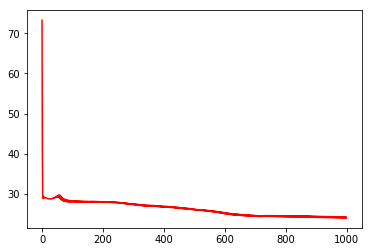

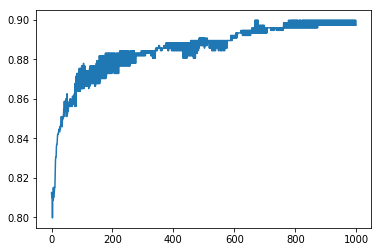

Test Accuracy:  0.832836
MSE: 24.0572


In [128]:
#Define the model
def mlp(x,weights,biases):
    #Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    #Hidden layer with sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    #Hidden layer with sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_1,weights['h3']),biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    #Hidden layer with sigmoid activation
    layer_4 = tf.add(tf.matmul(layer_1,weights['h4']),biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    #Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

#Define the weights and the biases for each layer
weights = {
    'h1':tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_4,n_class]))
}
biases = {
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_class]))
}

init = tf.global_variables_initializer()

saver = tf.train.Saver()

#Call the defined model
y = mlp(x,weights,biases)

#Define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

#Calculate the cost and the accuracy for each epoch

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={x:train_x,y_:train_y})
    cost = sess.run(cost_function, feed_dict={x:train_x,y_:train_y})
    cost_history = np.append(cost_history,cost)
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    pred_y = sess.run(y,feed_dict={x:test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x:train_x,y_:train_y}))
    accuracy_history.append(accuracy)
    
    print('epoch : ', epoch, ' - ', 'cost: ', cost, ' - MSE: ', mse_, "- Train Accuracy: ", accuracy)
    
save_path = saver.save(sess,model_path)
print("Model saved in file: %s" % save_path)

#plot mse and accuracy graph

plt.plot(mse_history,'r')
plt.show()
plt.plot(accuracy_history)
plt.show()

#Print the final accuracy

correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_:test_y})))

#print the final mean square error

pred_y = sess.run(y,feed_dict={x:test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))


In [ ]:
#In order to restore a model, utilize the same code, but need 
#to define the model path: model_path = os.getcwd()
#Need to ensure that the saver function is present
#And need to ensure that the neyahsjthe omeh teh oshst he kke jsja  
#And need to ensure that that saver.restore(sess,model_path)

In [151]:
#Example of restore a model
#Input model parameters, optimization, and training step
init = tf.global_variables_initializer()
saver = tf.train.Saver()
sess = tf.Session()
sess.run(init)
saver.restore(sess,model_path)

prediction = tf.argmax(y,1)
correct_prediction = tf.equal(prediction,tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

#print (accuracy_run)

for i in range(50,101):
    prediction_run = sess.run(prediction,feed_dict={x:X[i].reshape(1,15)})
    accuracy_run = sess.run(accuracy, feed_dict={x:X[i].reshape(1,15),y_:Y[i].reshape(1,2)})
    print("Original Class: ", Y[i], "Predicted Values : ", prediction_run)

INFO:tensorflow:Restoring parameters from C:\Users\oaoni\OneDrive - McMaster University\CSE\Term2\CAS771\BigDataProject
Original Class:  [ 1.  0.] Predicted Values :  [0]
Original Class:  [ 1.  0.] Predicted Values :  [0]
Original Class:  [ 1.  0.] Predicted Values :  [1]
Original Class:  [ 1.  0.] Predicted Values :  [0]
Original Class:  [ 1.  0.] Predicted Values :  [0]
Original Class:  [ 0.  1.] Predicted Values :  [1]
Original Class:  [ 0.  1.] Predicted Values :  [1]
Original Class:  [ 1.  0.] Predicted Values :  [0]
Original Class:  [ 0.  1.] Predicted Values :  [0]
Original Class:  [ 0.  1.] Predicted Values :  [1]
Original Class:  [ 0.  1.] Predicted Values :  [0]
Original Class:  [ 0.  1.] Predicted Values :  [1]
Original Class:  [ 1.  0.] Predicted Values :  [0]
Original Class:  [ 1.  0.] Predicted Values :  [0]
Original Class:  [ 0.  1.] Predicted Values :  [0]
Original Class:  [ 1.  0.] Predicted Values :  [0]
Original Class:  [ 1.  0.] Predicted Values :  [0]
Original Clas

In [155]:
len([200, 200])

2